In [14]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# File path to the shapefile
#shapefile_path = "C:\Proyectos\Elecciones-2024\data\shapefiles\Shapefile Mexico\DISTRITO_FEDERAL.shp"

shapefile_path = "C:\Proyectos\Elecciones-2024\data\shapefiles\Distritos Federales 2024 Magar\disfed2024.shp"


#file path to data 
# esto funciona
#csv_file_path = "C:\Proyectos\Elecciones-2024\data\processed\Aggregated_2024_distritos_federales.csv"

csv_file_path = r'C:\Proyectos\Elecciones-2024\data\processed\Coaliciones_2024_distritos_federales.csv'

#Pero lo vamos a sustituir por otro con datos más trabajados 





In [15]:

# Load the shapefile into a GeoDataFrame
gdf = gpd.read_file(shapefile_path)

# Load the electoral data into a DataFrame
df = pd.read_csv(csv_file_path)

print(gdf.head())


      ID  ENTIDAD  CONTROL LAYER    ORD  DISTRITO  EDONDIS  \
0   9578       15     9621   mex  34271        33     1533   
1  12504       15    14948   mex  30426        34     1534   
2   9882       15    10000   mex  30024        31     1531   
3   7913       15    10476   mex  31606        32     1532   
4  12596       15    15053   mex  29164        37     1537   

                                                PATH  \
0  /home/eric/Desktop/data/elecs/MXelsCalendGovt/...   
1  /home/eric/Desktop/data/elecs/MXelsCalendGovt/...   
2  /home/eric/Desktop/data/elecs/MXelsCalendGovt/...   
3  /home/eric/Desktop/data/elecs/MXelsCalendGovt/...   
4  /home/eric/Desktop/data/elecs/MXelsCalendGovt/...   

                                            geometry  
0  POLYGON ((1139940.211 2130489.257, 1139910.911...  
1  POLYGON ((1063081.162 2133795.912, 1063004.212...  
2  POLYGON ((1129561.472 2153831.070, 1129512.680...  
3  POLYGON ((1134280.131 2142006.628, 1134343.447...  
4  POLYGON ((10

In [16]:
#print(df.head())
# ID_ENTIDAD, ID_DISTRITO_FEDERAL

df.columns


Index(['ID_ENTIDAD', 'ENTIDAD', 'ID_DISTRITO_FEDERAL', 'DISTRITO_FEDERAL',
       'PAN', 'PRI', 'PRD', 'PVEM', 'PT', 'MC', 'MORENA',
       'CANDIDATO/A INDEPENDIENTE', 'PAN_PRI_PRD', 'PAN_PRI', 'PAN_PRD',
       'PRI_PRD', 'PVEM_PT_MORENA', 'PVEM_PT', 'PVEM_MORENA', 'PT_MORENA',
       'CANDIDATO/A NO REGISTRADO/A', 'VOTOS NULOS', 'TOTAL_VOTOS_CALCULADOS',
       'LISTA_NOMINAL', 'PARTY_WITH_MOST_VOTES', 'MOST_VOTES',
       'PERCENTAGE_MOST_VOTES', 'COALITION', 'Morena_Coalition_Votes',
       'Opposition_Coalition_Votes', 'MC_Coalition_Votes',
       'Morena_Coalition_Percentage', 'Opposition_Coalition_Percentage',
       'MC_Coalition_Percentage'],
      dtype='object')

In [57]:
#print(gdf.head())
gdf # 300
#ENTIDAD, DISTRITO_F

,ID,ENTIDAD,CONTROL,LAYER,ORD,DISTRITO,EDONDIS,PATH,geometry
0,9578,15,9621,mex,34271,33,1533,/home/eric/Desktop/data/elecs/MXelsCalendGovt/...,"POLYGON ((1139940.211 2130489.257, 1139910.911..."
1,12504,15,14948,mex,30426,34,1534,/home/eric/Desktop/data/elecs/MXelsCalendGovt/...,"POLYGON ((1063081.162 2133795.912, 1063004.212..."
2,9882,15,10000,mex,30024,31,1531,/home/eric/Desktop/data/elecs/MXelsCalendGovt/...,"POLYGON ((1129561.472 2153831.070, 1129512.680..."
3,7913,15,10476,mex,31606,32,1532,/home/eric/Desktop/data/elecs/MXelsCalendGovt/...,"POLYGON ((1134280.131 2142006.628, 1134343.447..."
4,12596,15,15053,mex,29164,37,1537,/home/eric/Desktop/data/elecs/MXelsCalendGovt/...,"POLYGON ((1085281.485 2187739.490, 1085201.814..."
...,...,...,...,...,...,...,...,...,...
295,10498,15,11274,mex,31234,24,1524,/home/eric/Desktop/data/elecs/MXelsCalendGovt/...,"POLYGON ((1101498.987 2158949.279, 1101491.512..."
296,9823,15,9940,mex,32182,29,1529,/home/eric/Desktop/data/elecs/MXelsCalendGovt/...,"POLYGON ((1125479.617 2155648.594, 1125418.863..."
297,12286,15,14705,mex,34078,30,1530,/home/eric/Desktop/data/elecs/MXelsCalendGovt/...,"POLYGON ((1136897.016 2155006.238, 1136827.312..."
298,12486,15,14929,mex,29726,27,1527,/home/eric/Desktop/data/elecs/MXelsCalendGovt/...,"POLYGON ((1064025.387 2125090.055, 1064049.206..."


In [17]:
gdf['ID_ENTIDAD'] = gdf['ENTIDAD'].astype(str)
df['ID_ENTIDAD'] = df['ID_ENTIDAD'].astype(str)
gdf['ID_DISTRITO_FEDERAL'] = gdf['DISTRITO'].astype(str)
df['ID_DISTRITO_FEDERAL'] = df['ID_DISTRITO_FEDERAL'].astype(str)

In [18]:
merged_gdf = gdf.merge(df, on=['ID_ENTIDAD', 'ID_DISTRITO_FEDERAL'], how = "outer", suffixes = ("_geo","_edata"))
merged_gdf

,ID,ENTIDAD_geo,CONTROL,LAYER,ORD,DISTRITO,EDONDIS,PATH,geometry,ID_ENTIDAD,...,PARTY_WITH_MOST_VOTES,MOST_VOTES,PERCENTAGE_MOST_VOTES,COALITION,Morena_Coalition_Votes,Opposition_Coalition_Votes,MC_Coalition_Votes,Morena_Coalition_Percentage,Opposition_Coalition_Percentage,MC_Coalition_Percentage
0,9578,15,9621,mex,34271,33,1533,/home/eric/Desktop/data/elecs/MXelsCalendGovt/...,"POLYGON ((1139940.211 2130489.257, 1139910.911...",15,...,MORENA,87131.0,51.914059,Morena,117194.0,28265.0,12314.0,69.826081,16.840744,7.336880
1,12504,15,14948,mex,30426,34,1534,/home/eric/Desktop/data/elecs/MXelsCalendGovt/...,"POLYGON ((1063081.162 2133795.912, 1063004.212...",15,...,MORENA,93579.0,35.499167,Morena,121818.0,107464.0,28493.0,46.211624,40.766438,10.808812
2,9882,15,10000,mex,30024,31,1531,/home/eric/Desktop/data/elecs/MXelsCalendGovt/...,"POLYGON ((1129561.472 2153831.070, 1129512.680...",15,...,MORENA,117249.0,50.968519,Morena,137215.0,50660.0,28971.0,59.647803,22.022066,12.593787
3,7913,15,10476,mex,31606,32,1532,/home/eric/Desktop/data/elecs/MXelsCalendGovt/...,"POLYGON ((1134280.131 2142006.628, 1134343.447...",15,...,MORENA,78079.0,47.214445,Morena,108312.0,34584.0,15534.0,65.496369,20.912977,9.393424
4,12596,15,15053,mex,29164,37,1537,/home/eric/Desktop/data/elecs/MXelsCalendGovt/...,"POLYGON ((1085281.485 2187739.490, 1085201.814...",15,...,MORENA,97657.0,46.171339,Morena,127144.0,52225.0,25017.0,60.112524,24.691504,11.827810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,10498,15,11274,mex,31234,24,1524,/home/eric/Desktop/data/elecs/MXelsCalendGovt/...,"POLYGON ((1101498.987 2158949.279, 1101491.512...",15,...,MORENA,113885.0,45.087792,Morena,148411.0,73946.0,23641.0,58.756854,29.275689,9.359622
296,9823,15,9940,mex,32182,29,1529,/home/eric/Desktop/data/elecs/MXelsCalendGovt/...,"POLYGON ((1125479.617 2155648.594, 1125418.863...",15,...,MORENA,109968.0,48.054746,Morena,134184.0,52828.0,29077.0,58.636858,23.085226,12.706313
297,12286,15,14705,mex,34078,30,1530,/home/eric/Desktop/data/elecs/MXelsCalendGovt/...,"POLYGON ((1136897.016 2155006.238, 1136827.312...",15,...,MORENA,75646.0,47.726183,Morena,94201.0,45751.0,13721.0,59.432808,28.864984,8.656782
298,12486,15,14929,mex,29726,27,1527,/home/eric/Desktop/data/elecs/MXelsCalendGovt/...,"POLYGON ((1064025.387 2125090.055, 1064049.206...",15,...,MORENA,88175.0,33.858897,Morena,121709.0,108783.0,24591.0,46.735837,41.772298,9.442859


In [19]:
merged_gdf.columns

Index(['ID', 'ENTIDAD_geo', 'CONTROL', 'LAYER', 'ORD', 'DISTRITO', 'EDONDIS',
       'PATH', 'geometry', 'ID_ENTIDAD', 'ID_DISTRITO_FEDERAL',
       'ENTIDAD_edata', 'DISTRITO_FEDERAL', 'PAN', 'PRI', 'PRD', 'PVEM', 'PT',
       'MC', 'MORENA', 'CANDIDATO/A INDEPENDIENTE', 'PAN_PRI_PRD', 'PAN_PRI',
       'PAN_PRD', 'PRI_PRD', 'PVEM_PT_MORENA', 'PVEM_PT', 'PVEM_MORENA',
       'PT_MORENA', 'CANDIDATO/A NO REGISTRADO/A', 'VOTOS NULOS',
       'TOTAL_VOTOS_CALCULADOS', 'LISTA_NOMINAL', 'PARTY_WITH_MOST_VOTES',
       'MOST_VOTES', 'PERCENTAGE_MOST_VOTES', 'COALITION',
       'Morena_Coalition_Votes', 'Opposition_Coalition_Votes',
       'MC_Coalition_Votes', 'Morena_Coalition_Percentage',
       'Opposition_Coalition_Percentage', 'MC_Coalition_Percentage'],
      dtype='object')

In [ ]:
#save the joint df



In [23]:
#output_file_path = r'C:\Proyectos\Elecciones-2024\data\processed\Coalicionesconshp_2024_distritos_federales.csv'
#merged_gdf.to_csv(output_file_path, index=False)

<Figure size 2500x2500 with 0 Axes>

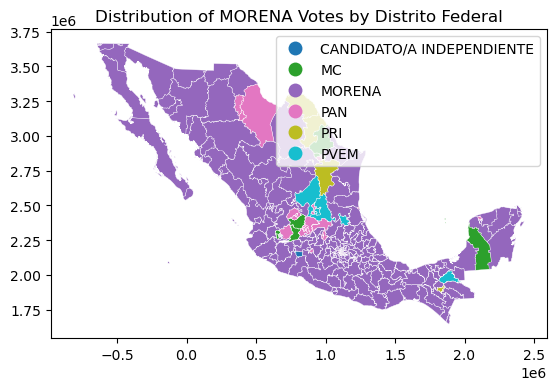

In [41]:
plt.figure(figsize=(25, 25))


merged_gdf.plot(column='PARTY_WITH_MOST_VOTES', legend=True, edgecolor='white', linewidth=0.25)

# Add a title and show the plot
plt.title('Distribution of MORENA Votes by Distrito Federal')
plt.show()

In [42]:
pip install cartogram


Note: you may need to restart the kernel to use updated packages.


In [45]:
library(sf)

plot(merged_gdf(geometry))

NameError: name 'library' is not defined